# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [20]:
# cargar datos
df = pd.read_csv(os.path.join("iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

### 1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [21]:
df.species.unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

In [22]:
df['species']=df['species'].str.lower().str.strip().fillna('default')
df.species.unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

Lo que se hizo fue tomar por iguales los nombres con mayuscula, minuscula y con espacios

### 2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

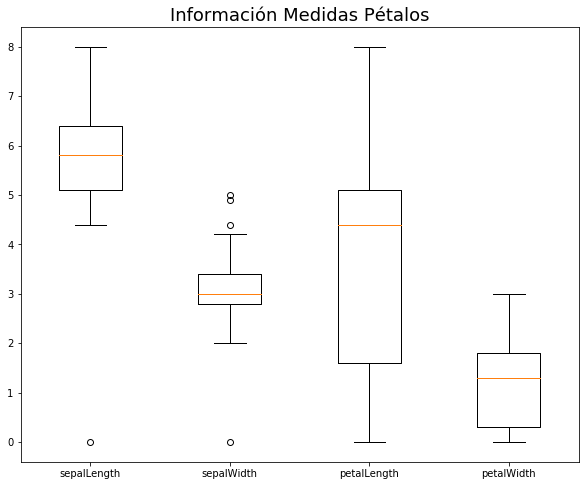

In [31]:


fig = plt.figure(figsize=(10, 8))
plt.boxplot([df['sepalLength'].fillna(0),df['sepalWidth'].fillna(0),df['petalLength'].fillna(0),df['petalWidth'].fillna(0)],labels=['sepalLength','sepalWidth','petalLength','petalWidth'])
plt.title('Información Medidas Pétalos', size=18)
plt.show()


### 3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [95]:
lista=[[],[],[],[],[]]
label=[None]*len(df['species'])
for i in range(len(df['species'])):
    if (df.species[i] in ['setosa','virginica', 'versicolor'])and (4<=df.sepalLength[i]<=7) and (2<=df.sepalWidth[i]<=4.5) and (1<=df.petalLength[i]<=7) and (0.1<=df.petalWidth[i]<=2.5):
        label[i]=True
        lista[0].append(df.species[i])
        lista[1].append(df.sepalLength[i])
        lista[2].append(df.sepalWidth[i])
        lista[3].append(df.petalLength[i])
        lista[4].append(df.petalWidth[i])
    else:
        label[i]=False


In [96]:
df['label']=label
df.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True
149,5.2,4.1,1.5,0.1,setosa,True


### 4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

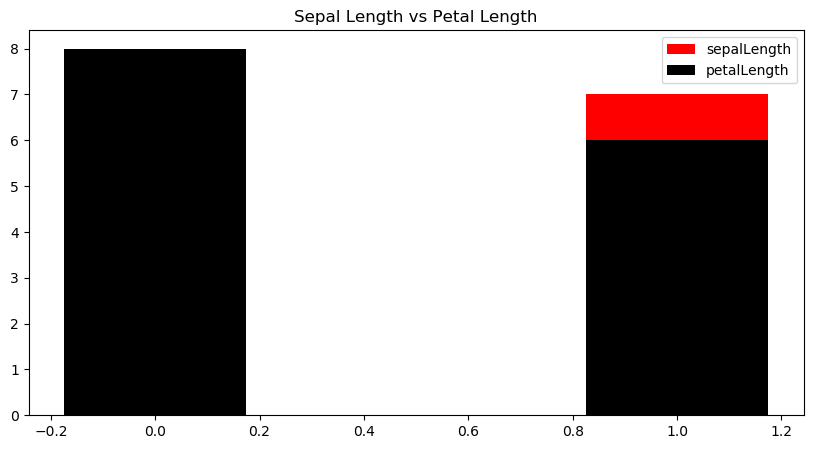

In [105]:
y1=df.sepalLength
y2=df.petalLength
x=df.label

plt.figure(figsize=(10, 5))
plt.bar(x,y1,0.35,color='red')
plt.bar(x,y2,0.35,color='black')
plt.legend(['sepalLength','petalLength'])
plt.title("Sepal Length vs Petal Length") 
plt.show()


Concluimos que Petal Lenght tiene más valores admisibles

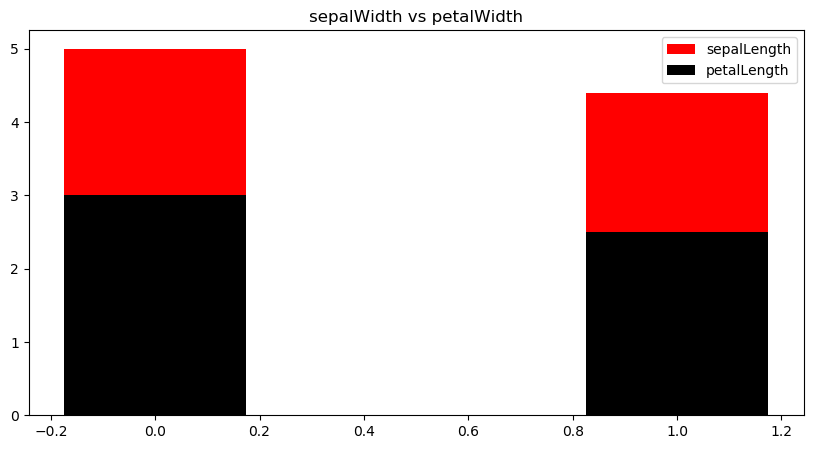

In [107]:
y1=df.sepalWidth
y2=df.petalWidth
x=df.label

plt.figure(figsize=(10, 5))
plt.bar(x,y1,0.35,color='red')
plt.bar(x,y2,0.35,color='black')
plt.legend(['sepalLength','petalLength'])
plt.title("sepalWidth vs petalWidth") 
plt.show()


### 5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

La corrección de los datos ya se hize en la parte 3

In [99]:
l=['species', 'sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
for i in range(5):
    print('Los valores corregidos para: ', l[i], 'son', list(set(lista[i])))
    print('')

Los valores corregidos para:  species son ['setosa', 'versicolor', 'virginica']

Los valores corregidos para:  sepalLength son [4.9, 5.5, 5.8, 6.8, 6.2, 6.3, 6.7, 6.9, 6.4, 6.5, 5.6, 6.0, 7.0, 4.5, 4.6, 5.4, 5.9, 5.0, 5.1, 6.6, 6.1, 4.8, 4.7, 5.7, 5.2, 5.3]

Los valores corregidos para:  sepalWidth son [2.8, 3.4, 3.0, 3.3, 3.1, 3.2, 2.5, 2.7, 2.9, 2.2, 3.5, 4.4, 4.0, 4.1, 2.6, 3.6, 2.3, 3.7, 3.8, 4.2, 2.4, 3.9]

Los valores corregidos para:  petalLength son [1.6, 1.7, 3.9, 4.9, 5.6, 5.4, 5.7, 6.0, 5.1, 5.2, 5.9, 5.3, 5.8, 5.5, 1.5, 3.5, 4.5, 4.6, 4.4, 4.0, 4.1, 5.0, 1.0, 1.1, 3.6, 1.2, 3.8, 3.3, 3.7, 4.8, 4.7, 4.2, 4.3, 1.3, 1.9, 1.4]

Los valores corregidos para:  petalWidth son [0.6, 1.9, 2.5, 2.4, 2.1, 2.3, 2.2, 2.0, 1.8, 1.7, 1.6, 1.5, 1.0, 0.5, 1.1, 0.2, 1.2, 0.1, 0.3, 1.3, 1.4, 0.4]



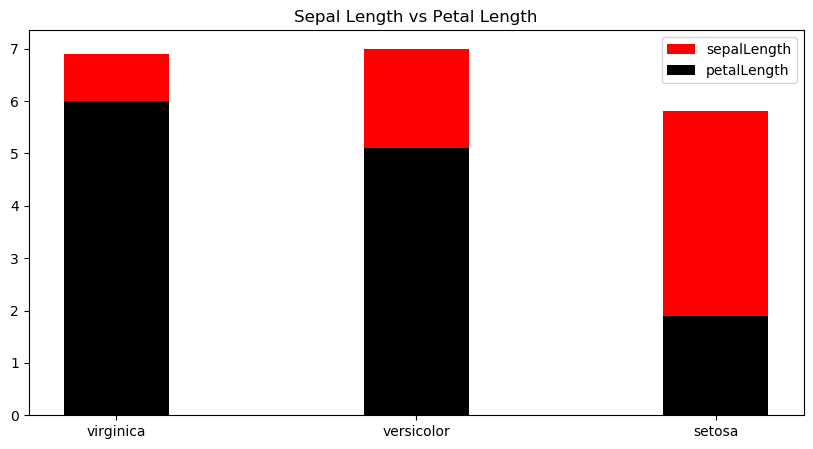

In [104]:
y1=lista[1]
y2=lista[3]
x=lista[0]

plt.figure(figsize=(10, 5))
plt.bar(x,y1,0.35,color='red')
plt.bar(x,y2,0.35,color='black')
plt.legend(['sepalLength','petalLength'])
plt.title("Sepal Length vs Petal Length") 
plt.show()


Concluimos que ahora es SepalLength quien tiene más valores.